<h1 align="center">
<span style="color: red;">$\textbf{Quantum Fourier Transformation}$</center>
</h1>

# Defination

The discrete Fourier transform acts on a vector $(x_0, ..., x_{N-1})$ and maps it to the vector $(y_0, ..., y_{N-1})$ according to the formula


$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$


where $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$.

Similarly, the quantum Fourier transform acts on a quantum state $\sum_{i=0}^{N-1} x_i \vert i \rangle$ and maps it to the quantum state $\sum_{i=0}^{N-1} y_i \vert i \rangle$ according to the formula


$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$


with $\omega_N^{jk}$ defined as above. Note that only the amplitudes of the state were affected by this transformation.

This can also be expressed as the map:


$$\vert x \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle$$


Or the unitary matrix:

$$ U_{QFT} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} \omega_N^{xy} \vert y \rangle \langle x \vert$$

**Uncomment the following lines to load my notes**
<img src="Images/qft_note0.JPG" width=90% height=60% >
<img src="Images/qft_note1.JPG" width=90% height=60% >
<img src="Images/qft_note2.JPG" width=90% height=60% >



## Example 1: 1-qubit QFT

Consider how the QFT operator as defined above acts on a single qubit state $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$. In this case, $x_0 = \alpha$, $x_1 = \beta$, and $N = 2$. Then,



$$y_0 = \frac{1}{\sqrt{2}}\left(    \alpha \exp\left(2\pi i\frac{0\times0}{2}\right) + \beta \exp\left(2\pi i\frac{1\times0}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha + \beta\right)$$

and


$$y_1 = \frac{1}{\sqrt{2}}\left(    \alpha \exp\left(2\pi i\frac{0\times1}{2}\right) + \beta \exp\left(2\pi i\frac{1\times1}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha - \beta\right)$$



such that the final result is the state 



$$U_{QFT}\vert\psi\rangle = \frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle$$



This operation is exactly the result of applying the Hadamard operator ($H$) on the qubit:



$$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$



If we apply the $H$ operator to the state $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$, we obtain the new state:

$$\frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle 
\equiv \tilde{\alpha}\vert 0 \rangle + \tilde{\beta}\vert 1 \rangle$$

Notice how the Hadamard gate performs the discrete Fourier transform for $N = 2$ on the amplitudes of the state. 

## 5. The Circuit that Implements the QFT 


The circuit that implements QFT makes use of two gates. The first one is a single-qubit Hadamard gate, $H$. The second is a two-qubit controlled rotation $CROT_k$.


**Please uncomment this to load the image**
<img src="Images/qft_note3.png" width=90% height=60% >


Given these two gates, a circuit that implements **an n-qubit QFT** is shown below.

![image1](Images/qft_circuit.png)


The circuit operates as follows. We start with an n-qubit input state $\vert x_1x_2\ldots x_n\rangle$.

<ol>
<li> After the first Hadamard gate on qubit 1, the state is transformed from the input state to 

$$
H_1\vert x_1x_2\ldots x_n\rangle = 
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

<li> After the $UROT_2$ gate on qubit 1 controlled by qubit 2, the state is transformed to

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$
    
Note in the bracket that the value of k is 2 (hence $2^2$) in the case of $x_2$ and 1 (hence $2^1$) for the case of $x_1$.

<li> After the application of the last $UROT_n$ gate on qubit 1 controlled by qubit $n$, the state becomes

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x_n + 
\frac{2\pi i}{2^{n-1}}x_{n-1} + 
\ldots + 
\frac{2\pi i}{2^2}x_2 + 
\frac{2\pi i}{2}x_1
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

Noting that 

$$
x = 2^{n-1}x_1 + 2^{n-2}x_2 + \ldots + 2^1x_{n-1} + 2^0x_n
$$

we can write the above state as 

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x 
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

<li> After the application of a similar sequence of gates for qubits $2\ldots n$, we find the final state to be:

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x 
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{n-1}}x 
\right)
\vert1\rangle\right]
\otimes
\ldots
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{2}}x 
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{1}}x 
\right)
\vert1\rangle\right]
$$

which is exactly the QFT of the input state as derived above with the caveat that the order of the qubits is reversed in the output state.
</ol>

## 6. Example 2: 1-qubit QFT


**Please uncomment this to load the image**
<img src="Images/qft_note4.jpeg" width=60%>



## Qiskit Implementation

In [1]:
import numpy as np
import pylab as plt
from numpy import pi

from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector


In [2]:
qc = QuantumCircuit(3)

**Note**: Remember that Qiskit's least significant bit has the lowest index (0), thus the circuit will be mirrored through the horizontal in relation to the image in section 5. First, we apply a H-gate to qubit 2 :

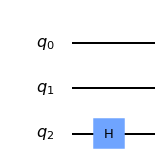

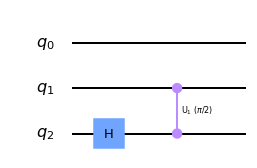

In [3]:
qc = QuantumCircuit(3)
qc.h(2)
display( qc.draw('mpl') )

# UROT_2 gate to x1 depending on x2
qc.cu1(pi/2, 1, 2) # CROT from qubit 1 to qubit 2 hence the angle: pi/2^{2-1}
display ( qc.draw('mpl') )

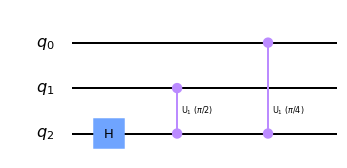

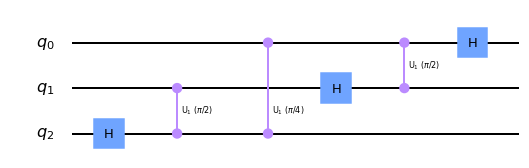

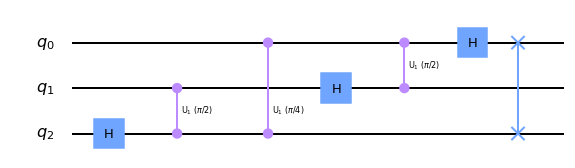

In [4]:
qc.cu1(pi/4, 0, 2) # CROT from qubit 2 to qubit 0 hence the angle: pi/2^{2-0}
display( qc.draw('mpl') )

# Repeat the process for 2 and 3 
qc.h(1)  # Hadamard on 1
qc.cu1(pi/2, 0, 1) # CROT from qubit 0 to qubit 1 hence the angle: pi/2^{1-0}
qc.h(0)  # Hadamard on 0
display( qc.draw('mpl') )

# Now swap the qubit 0 and 2 to complete QFT. [NOT CLEAR TO ME]
qc.swap(0,2)
display ( qc.draw('mpl') )

## General QFT Function

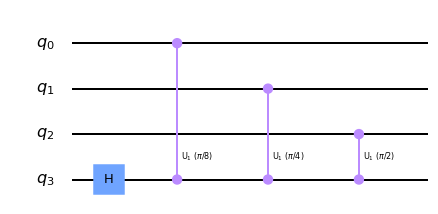

In [5]:
def qft_rotations(ckt, n):
    if n == 0:
        return ckt
    n -= 1
    ckt.h(n)
    for qubit in range(n):
        ckt.cu1( pi/2**(n-qubit), qubit, n )

qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw('mpl')

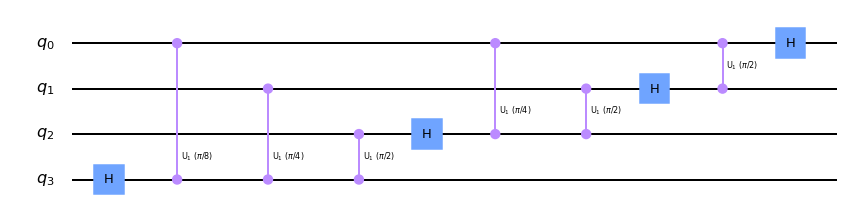

In [6]:
def qft_rotations(ckt, n):
    if n == 0:
        return ckt
    n -= 1
    ckt.h(n)
    for qubit in range(n):
        ckt.cu1( pi/2**(n-qubit), qubit, n )
        
    qft_rotations(ckt, n)
        
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw('mpl')

In [25]:
from qiskit_textbook.widgets import scalable_circuit
scalable_circuit(qft_rotations)

ModuleNotFoundError: No module named 'numexpr'

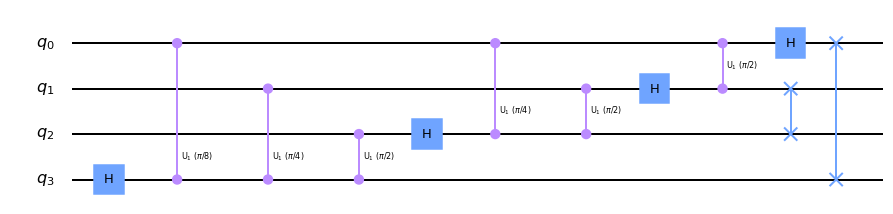

In [8]:
def swap_registers(ckt, n):
    for qubit in range(n//2):
        ckt.swap(qubit, n-qubit-1)
    return ckt

def qft(ckt, n):
    qft_rotations(ckt, n)
    swap_registers(ckt, n)
    return ckt

qc = QuantumCircuit(4)
qft(qc, 4)
qc.draw('mpl')

## Testing the Circuit

In [9]:
print (f"5 and it's binary: {bin(5)}")
#bin(9)

5 and it's binary: 0b101


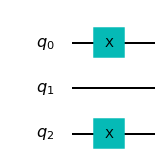

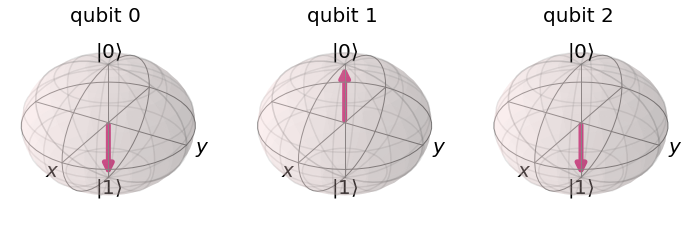

In [10]:
qc = QuantumCircuit(3)
qc.x(0)
qc.x(2)
display(qc.draw('mpl'))
backend = Aer.get_backend('statevector_simulator')
sv = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(sv)

In [11]:
print (sv.real)

[0. 0. 0. 0. 0. 1. 0. 0.]


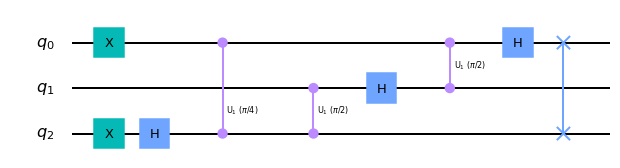

In [12]:
qft(qc, 3)
qc.draw('mpl')

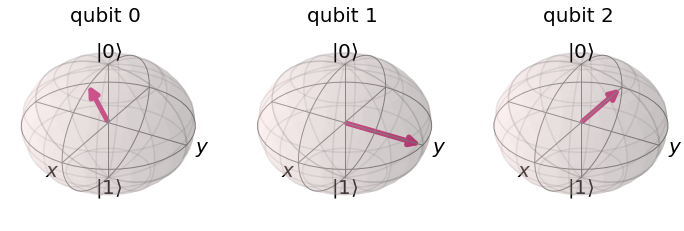

In [13]:
sv = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(sv)


In [14]:
print ('The statevectors are:\n', sv.round(1))
print ('Angle subtended by each states (as a factor of pi):\n',(np.angle(sv)/np.pi).round(2))


The statevectors are:
 [ 0.4-0.j  -0.3-0.2j  0. +0.4j  0.2-0.3j -0.4+0.j   0.3+0.2j -0. -0.4j
 -0.2+0.3j]
Angle subtended by each states (as a factor of pi):
 [-0.   -0.75  0.5  -0.25  1.    0.25 -0.5   0.75]


We can see our QFT function has worked correctly. Compared the the state  $\vert 0 \rangle= \vert+++\rangle$ , Qubit $0$ has been rotated by  $5/8$  of a full turn, qubit $1$ by  $10 /8$  full turns (equivalent to  $1/4$  of a full turn), and qubit $2$ by  $20/8$  full turns (equivalent to  $1/2$  of a full turn).
yesma hamile diyeko ko input 5(101) thaha pauna sakinxa yesko rotation herera main kura

## Another demo with 2 qubits



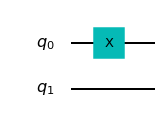

In [15]:
# 10
qc = QuantumCircuit(2)
qc.x(0)
qc.draw('mpl')

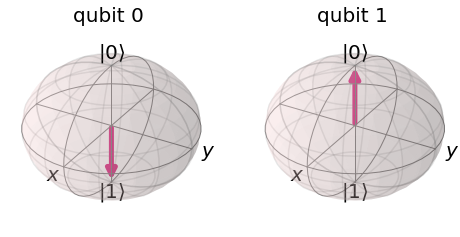

In [16]:
backend = Aer.get_backend('statevector_simulator')
sv = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(sv)

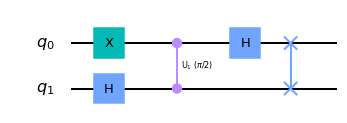

In [17]:
qft(qc, 2)
qc.draw('mpl')

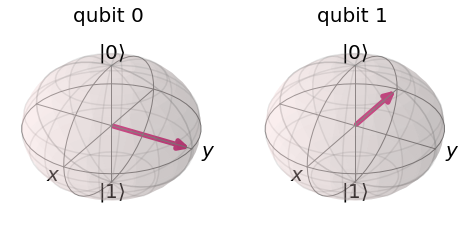

In [18]:
backend = Aer.get_backend('statevector_simulator')
sv = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(sv)

## Inverse Fourier Transform

In [19]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    # use .decompose() which allows us to see the individual gates
    return circuit.decompose() 


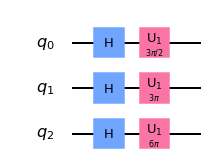

In [20]:
nqubits = 3
number = 6
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.u1(number*pi/4,0)
qc.u1(number*pi/2,1)
qc.u1(number*pi,2)

qc.draw('mpl')

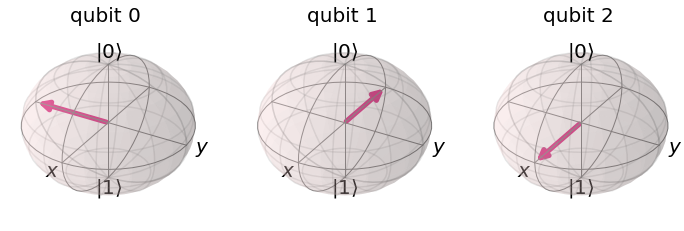

In [21]:
backend = Aer.get_backend("statevector_simulator")
sv = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(sv)

In [22]:

print ('The statevectors are:\n', sv.round(1))
print ('Angle subtended by each states (as a factor of pi):\n',(np.angle(sv)/np.pi).round(2))


The statevectors are:
 [ 0.4+0.j  -0. -0.4j -0.4+0.j   0. +0.4j  0.4+0.j  -0. -0.4j -0.4+0.j
  0. +0.4j]
Angle subtended by each states (as a factor of pi):
 [ 0.  -0.5  1.   0.5  0.  -0.5  1.   0.5]


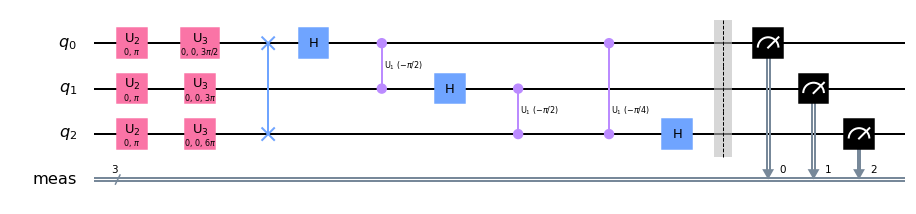

In [23]:
qc = inverse_qft(qc,nqubits)
qc.measure_all()
qc.draw('mpl')

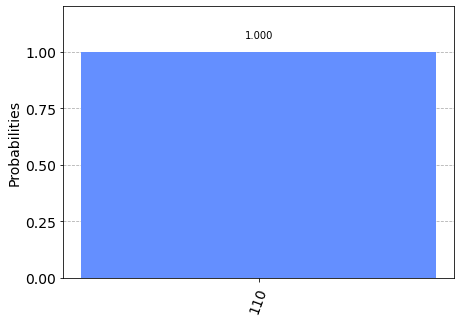

In [24]:
backend = Aer.get_backend("qasm_simulator")

shots = 2048
job = execute(qc, backend=backend, shots=shots, optimization_level=3)

counts = job.result().get_counts()
plot_histogram(counts)